<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/Multi_Lablel_Image_Classification_on_Poster_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing import image

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [46]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
data.shape

(7254, 27)

In [48]:
img_width = 350
img_height = 350

x = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size= (img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)
x= np.array(x)

100%|██████████| 7254/7254 [00:41<00:00, 175.62it/s]


In [49]:
x.shape

(7254, 350, 350, 3)

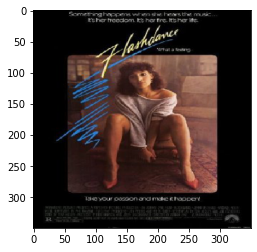

In [50]:
plt.imshow(x[1])

In [51]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [52]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

**Build CNN**

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 32)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(x_train, y_train, epochs= 5, validation_data=(x_test, y_test))

Epoch 1/5
193/193 [==============================] - 171s 884ms/step - loss: 0.6917 - accuracy: 0.1025 - val_loss: 1.4426 - val_accuracy: 9.1827e-04
Epoch 2/5
193/193 [==============================] - 177s 917ms/step - loss: 0.3170 - accuracy: 0.2441 - val_loss: 0.5518 - val_accuracy: 0.0551
Epoch 3/5
193/193 [==============================] - 180s 931ms/step - loss: 0.2628 - accuracy: 0.2863 - val_loss: 0.3036 - val_accuracy: 0.1607
Epoch 4/5
193/193 [==============================] - 168s 869ms/step - loss: 0.2525 - accuracy: 0.3015 - val_loss: 0.3463 - val_accuracy: 0.1717
Epoch 5/5
193/193 [==============================] - 164s 848ms/step - loss: 0.2471 - accuracy: 0.3129 - val_loss: 0.6377 - val_accuracy: 0.1148


In [0]:

def plot_learningCurve(history, epoch):
  #plot training accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'], loc = 'upper left')
  plt.show()
  #plot taining loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

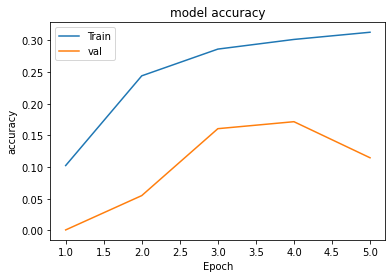

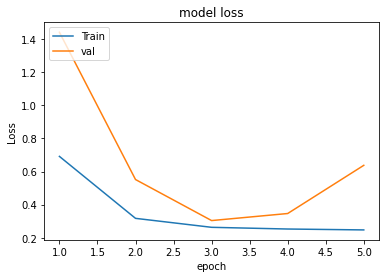

In [59]:
plot_learningCurve(history, 5)

**Testing Model**

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Romance
Mystery
Adventure


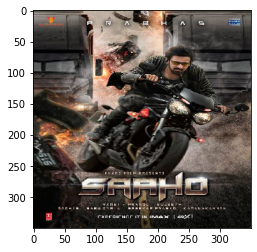

In [60]:
  img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size= (img_width, img_height, 3))
  plt.imshow(img)
  img = image.img_to_array(img)
  img = img/255.0
  
  img = img.reshape(1, img_width, img_height, 3)
  classes = data.columns[2:]
  print(classes)
  y_prob = model.predict(img)
  top3 = np.argsort(y_prob[0])[:-4:-1]

  for i in range(3):
    print(classes[top3[i]])